#  Data Preprocess

#### YouTube comments preprocessing for sentiment analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
#from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from collections import Counter
from wordcloud import WordCloud
from torch.utils.data import Dataset
from datasets import Dataset as HFDataset 
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import Dataset, DataLoader



nltk.download('punkt_tab')        # For tokenization
nltk.download("stopwords")      # Stopwords list
nltk.download("wordnet")        # Lemmatization



/Users/olaoluwatunmise/YT-Sentiment-Analysis/SDS-CP020-sentiment-analysis-using-youtube/youtube_sentiment/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/olaoluwatunmise/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olaoluwatunmise/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/olaoluwatunmise/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
with open("comments.txt", "r", encoding = "utf-8") as file:
    lines = [line.strip() for line in file] #Remove extra spaces/newlines


df = pd.DataFrame(lines, columns = ["Comments"])
df.head(n = 20)

,Comments
0,"🤑 EXCLUSIVE Deals (Bonuses, Discounts, Giveawa..."
1,</a><br>🥇Bybit $60k rewards + 0% maker fees fo...
2,</a><br>🥈OKX $20k bonus + 40% fee discount for...
3,$888 coin is king🚀🚀
4,"you made a mistake in the video, Virtuals is n..."
5,where is the link to the report?
6,Dead internet theory is real. Ai bubbles are t...
7,@@pablog80 I am asking the same question
8,The best AI is Sensay
9,Sensay 🚀


#### Preprocess the Text
Steps:
- Convert to lowercase
- Remove HTML entities (&#39; → ')
- Remove emojis and special characters
- Tokenization (splitting into words)
- Remove stopwords (e.g., "the", "is", "and")
- Lemmatization (convert words to their base form, e.g., "running" → "run")

In [3]:
# Initialize Tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'&#\d+;', '', text) # Remove HTML entities
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\b#\w+\b', '', text)  # Remove words starting with '#'
    words = word_tokenize(text) # Tokenize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Lemmatization & remove stopwords
    return " ".join(words)



# Apply the function to all comments
df["Cleaned_Comments"] = df["Comments"].apply(clean_text)
df.head(n=50)

,Comments,Cleaned_Comments
0,"🤑 EXCLUSIVE Deals (Bonuses, Discounts, Giveawa...",exclusive deal bonus discount giveaway hrefhtt...
1,</a><br>🥇Bybit $60k rewards + 0% maker fees fo...,abrbybit k reward maker fee day hrefhttpswwwco...
2,</a><br>🥈OKX $20k bonus + 40% fee discount for...,abrokx k bonus fee discount life hrefhttpswwwc...
3,$888 coin is king🚀🚀,coin king
4,"you made a mistake in the video, Virtuals is n...",made mistake video virtuals solana base
5,where is the link to the report?,link report
6,Dead internet theory is real. Ai bubbles are t...,dead internet theory real ai bubble taking rea...
7,@@pablog80 I am asking the same question,pablog asking question
8,The best AI is Sensay,best ai sensay
9,Sensay 🚀,sensay


## Convert Text into ML-Friendly Format

#### For sentiment analysis, you need numerical representations:
- Tokenization using Hugging Face’s tokenizer
- Convert into input IDs and attention masks

In [4]:
# # Load pre-trained tokenizer (DistilBERT)
# # tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")



# # Tokenize the cleaned text
# tokens = tokenizer(df["Cleaned_Comments"].to_list(), padding=True, truncation=True, return_tensors="pt")

# # Display tokenized data
# tokens

In [5]:
# # Get token ids
# token_ids = tokens["input_ids"].numpy().flatten()

# # Count token frequencies
# words_counts = Counter(token_ids)

# # Convert token IDs back to words
# words = [tokenizer.decode([tok]) for tok, _ in words_counts.most_common(20)]


# # Plot frequency distribution
# plt.figure(figsize=(12,6))
# sns.barplot(x=words, y=[freq for _, freq in words_counts.most_common(20)])
# plt.xticks(rotation=45)
# plt.title("Top 20 Most Frequent Words")
# plt.show()

## Train the Sentiment Analysis Model




#### Load Pretrained Model and Tokenizer

- Convert tokenized data into PyTorch Dataset for training.
- Fine-tune a distilbert-base-uncased model for sentiment classification.

In [6]:
# Load pre-trained tokenizer and model for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Exploratory Data Analysis (EDA)

#### Handling Special Tokens:
If you'd like to exclude special tokens (like [CLS], [SEP], [PAD]), you can filter them out before plotting:

In [7]:
# Tokenize comments
inputs = tokenizer(df["Cleaned_Comments"].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=512)

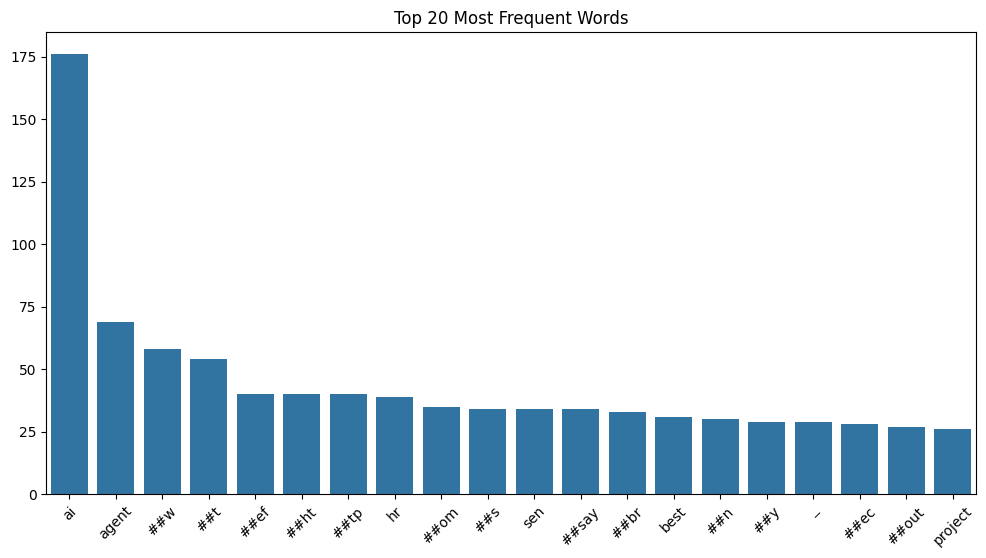

In [8]:
#Get token ids
token_ids = inputs["input_ids"].numpy().flatten()

# Remove special tokens
special_tokens = tokenizer.all_special_ids
filtered_token_ids = [tok for tok in token_ids if tok not in special_tokens]

# Count token frequencies again after filtering out special tokens
words_counts = Counter(filtered_token_ids)

token_ids = inputs["input_ids"].numpy().flatten()

# Convert token IDs back to words
words = [tokenizer.decode([tok]) for tok, _ in words_counts.most_common(20)]

# Plot frequency distribution
plt.figure(figsize=(12,6))
sns.barplot(x=words, y=[freq for _, freq in words_counts.most_common(20)])
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.show()


## Classify Sentiment Using Pre-trained Model

In [9]:


# Get model predictions
with torch.no_grad():
    outputs = model(**inputs)

# Convert logits to probabilities
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

# Get sentiment labels (0 = Negative, 1 = Positive)
labels = torch.argmax(predictions, axis=1).tolist()

# Convert Sentiment to 0, 1, 2
sentiment_mapping = {0: 1, 1: 0}  # 0 → Negative (1), 1 → Positive (0)
df["Sentiment_Label"] = [sentiment_mapping[label] for label in labels]

# Assign Neutral (2) to Some Cases
df.loc[predictions.max(dim=1).values.cpu().numpy() < 0.6, "Sentiment_Label"] = 2 # If model is unsure, mark as Neutral

# Now, this will work without errors!
df = df[['Cleaned_Comments', 'Sentiment_Label']]

print(df.head(n=20))  # Check if labels are correctly added

                                     Cleaned_Comments  Sentiment_Label
0   exclusive deal bonus discount giveaway hrefhtt...                1
1   abrbybit k reward maker fee day hrefhttpswwwco...                1
2   abrokx k bonus fee discount life hrefhttpswwwc...                1
3                                           coin king                0
4             made mistake video virtuals solana base                1
5                                         link report                1
6   dead internet theory real ai bubble taking rea...                1
7                              pablog asking question                1
8                                      best ai sensay                0
9                                              sensay                0
10                 ai getting smarter sensayai brsnsy                1
11                                 game changing snsy                0
12                                               snsy                1
13    

For fine-tuning on YouTube comments, the dataset should have two columns: text (the comment) and label (the sentiment)



In [10]:
df = df[['Cleaned_Comments', 'Sentiment_Label']] # Assuming 'Sentiment_Label' is the label column

# Tokenize the comments
tokens = tokenizer(df["Cleaned_Comments"].to_list(), padding=True, truncation=True, return_tensors="pt", max_length=512)

# Convert to Huggling Face Dataset
dataset = HFDataset.from_dict({
    "input_ids": tokens["input_ids"],
    "attention_mask": tokens["attention_mask"],
    "label": df["Sentiment_Label"].to_list()
})

## Define the Trainer

Now, you need to define the Trainer class for training the model. You'll specify hyperparameters for training and evaluation:

In [11]:
training_args = TrainingArguments(
    output_dir="./results",          # output directory
    eval_strategy="epoch",     # evaluation frequency
    learning_rate=2e-5,              # learning rate
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    num_train_epochs=3,              # number of training epochs
    weight_decay=0.01,               # strength of weight decay
)

trainer = Trainer(
    model=model,                         # the pre-trained model
    args=training_args,                  # training arguments
    train_dataset=dataset,               # training dataset
    eval_dataset=dataset,                # validation dataset (can be a separate dataset)
)


## Train the Model


Now you can start fine-tuning the model with the training dataset:

In [12]:
trainer.train()


Epoch,Training Loss,Validation Loss
1,No log,0.634259
2,No log,0.509542
3,No log,0.438603


TrainOutput(global_step=159, training_loss=0.874548282263414, metrics={'train_runtime': 97.9977, 'train_samples_per_second': 12.949, 'train_steps_per_second': 1.622, 'total_flos': 60739665713820.0, 'train_loss': 0.874548282263414, 'epoch': 3.0})

## Evaluation and Inference 

In [13]:
# Evaluate the model
trainer.evaluate()

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")


# Define label mapping
label_mapping = {0: "Negative", 1: "Positive", 2: "Neutral"}

# Predict sentiment on new comments
def predict_sentiment(comment):
    inputs = tokenizer(comment, return_tensors="pt", padding=True, truncation=True).to(device)
    output = model(**inputs)
    logits = output.logits
    probs = torch.nn.functional.softmax(logits, dim=-1)
    print("Probabilities:", probs)
    sentiment_label = torch.argmax(logits, dim=1).item()  # Get predicted sentiment label
    sentiment_name = label_mapping.get(sentiment_label, "Unknown")  # Map label to name
    return sentiment_name

# Example prediction
comment = "The girl is good"
sentiment = predict_sentiment(comment)
print(f"Predicted sentiment: {sentiment}")


Probabilities: tensor([[0.2714, 0.7286]], device='mps:0', grad_fn=<SoftmaxBackward0>)
Predicted sentiment: Positive


In [14]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

def classify_sentiment(comment):
    inputs = tokenizer(comment, return_tensors="pt", padding=True, truncation=True).to(device)
    output = model(**inputs)
    logits = output.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

comment = "I love this video!"
sentiment = classify_sentiment(comment)
print(f"Sentiment: {sentiment}")


Sentiment: 1


In [15]:


# Evaluate the model
eval_results = trainer.evaluate()

# Get predictions
predictions = trainer.predict(dataset)
preds = np.argmax(predictions.predictions, axis=-1)

# True labels
true_labels = dataset["label"]

# Compute classification report
report = classification_report(true_labels, preds, target_names=["Negative", "Positive", "Neutral"])
print("Classification Report:")
print(report)

# Compute accuracy
accuracy = accuracy_score(true_labels, preds)
print(f"Accuracy: {accuracy}")



Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.65      0.73       165
    Positive       0.78      0.92      0.85       250
     Neutral       0.00      0.00      0.00         8

    accuracy                           0.80       423
   macro avg       0.54      0.52      0.53       423
weighted avg       0.79      0.80      0.79       423

Accuracy: 0.7990543735224587


/Users/olaoluwatunmise/YT-Sentiment-Analysis/SDS-CP020-sentiment-analysis-using-youtube/youtube_sentiment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/olaoluwatunmise/YT-Sentiment-Analysis/SDS-CP020-sentiment-analysis-using-youtube/youtube_sentiment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/olaoluwatunmise/YT-Sentiment-Analysis/SDS-CP020-sentiment-analysis-using-youtube/youtube_sentiment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: 

## Save the Model

In [16]:
# model.save_pretrained("./sentiment_model")
# tokenizer.save_pretrained("./sentiment_model")

## Load the Model

In [17]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
# tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")